<a href="https://colab.research.google.com/github/ShauryaBhardwaj/Machine_learning_algorithms/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class k_means_model():

  # __init__ function takes in the essential parameters required for k means clustering and initialises the necessary variables and dataset if not provided
  def __init__(self , dataset=None , number_of_datapoints = 100 , number_of_clusters = 4 , x_max = 100 , x_min = -100):

    self.dataset = np.array([])   # contains the dataset which is either provided by the user of the model or can be generated using the create_dataset function
    self.datacenters = np.empty_like(np.zeros((1,2))) # contains the centers of the dataset if they are created
    self.k_centers = None   # contains the k centres around which final clustering will happen
    self.labels = None  # contains the center to which each point is assigned in each epoch

    #if dataset is not provided, it is generated.
    if(dataset!=None):
      self.dataset = dataset

    else:
      self.dataset = self.create_dataset(number_of_datapoints = number_of_datapoints , number_of_clusters = number_of_clusters , x_max = x_max , x_min = x_min)

  #function for generating the dataset. It is defined by number_if_datapoints, number_of_clusters, and the maximum and minumum values on the axes
  def create_dataset(self , number_of_datapoints , number_of_clusters , x_max , x_min):

    dataset = np.array([])

    for i in range(number_of_clusters):

      data_center = np.array([np.random.randint(x_min , x_max) , np.random.randint(x_min , x_max)] , ndmin = 2)
      if(i == 0):
        self.datacenters[0] = data_center
      else:
        self.datacenters = np.append(self.datacenters , data_center , axis = 0)

      sigma = max(np.abs(x_max) , np.abs(x_min))//(number_of_clusters)**2  # defining  the standard deviation of the randomly generated dataset

      #creating the normally distributed dataset with mean as a datacenter and standard deviation sigma
      x_data = data_center[0][0] + (sigma*np.random.randn(number_of_datapoints//number_of_clusters))
      y_data = data_center[0][1] + (sigma*np.random.randn(number_of_datapoints//number_of_clusters))

      x_data = x_data.reshape(-1 , 1)
      y_data = y_data.reshape(-1 , 1)

      temp_data = np.concatenate((x_data , y_data) , axis = 1)
      if(i == 0):
        dataset = temp_data
      else:
        dataset = np.append(dataset , temp_data ,  axis = 0)

    np.random.shuffle(dataset)

    return dataset

  # To randomly initialize the k centers that we want to predict for k-means clustering
  def randomly_initialize_k_centers(self , k=None):

    if(k==None):
      k=self.datacenters.shape[0]

    x_max = max(self.dataset[:,0])
    x_min = min(self.dataset[:,0])

    y_max = max(self.dataset[:,1])
    y_min = min(self.dataset[:,1])

    self.k_centers = np.array([np.random.randint(x_min , x_max) , np.random.randint(y_min , y_max)] , ndmin = 2)

    for i in range(k-1):
      self.k_centers = np.append(self.k_centers , np.array([np.random.randint(x_min , x_max) , np.random.randint(y_min , y_max)] , ndmin = 2) , axis=0)

  #to compute self.label variable. Which k_center does each of the datapoints belong to.
  def assign_datapoints(self):

    self.labels = np.zeros((self.dataset.shape[0] , 1))

    for i in range(self.dataset.shape[0]):

      distances = np.sqrt(np.sum((self.k_centers - self.dataset[i,:])**2 , axis=1))
      assignment = np.argmin(distances , axis = 0)
      self.labels[i] = assignment

  #based on self.labels, recomputing the new values of the k_centers
  def update_k_centers(self):

    k = self.k_centers.shape[0]

    updater_sum = np.zeros((k,2))
    counters = np.zeros((k,1))

    for i in range(self.dataset.shape[0]):

      updater_sum[int(self.labels[i][0])][0] += self.dataset[i][0]
      updater_sum[int(self.labels[i][0])][1] += self.dataset[i][1]

      counters[int(self.labels[i][0])] += 1

    for i in range(k):

      if(counters[i] != 0):
        self.k_centers[i][0] = (updater_sum[i][0]/counters[i])
        self.k_centers[i][1] = (updater_sum[i][1]/counters[i])

  def epoch(self):

      self.assign_datapoints()
      self.update_k_centers()
      self.plot_data_points()

  def train_kmm(self , number_of_epochs = 10):

    self.randomly_initialize_k_centers()
    for i in range(number_of_epochs):
      self.epoch()


  def plot_data_points(self):

    plt.style.use('seaborn-darkgrid')

    x_axis = self.dataset[: , 0]
    y_axis = self.dataset[: , 1]

    plt.scatter(x_axis , y_axis , c = 'b' , linewidth=0.5 , marker = '.')
    plt.scatter(self.datacenters[:,0] , self.datacenters[:,1] , c = 'r' , linewidth=1 , marker = '.')
    plt.scatter(self.k_centers[:,0] , self.k_centers[:,1] , c = 'g' , linewidth=1 , marker = '.')

    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title('Data Points')
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [10]:
kmm = k_means_model()

<ipython-input-6-3a55aa569098>:114: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


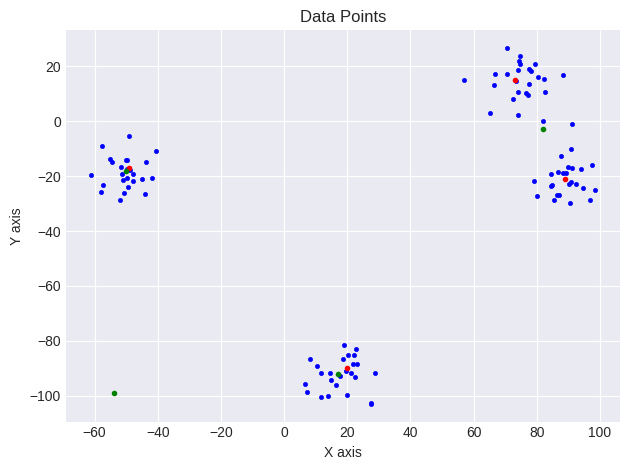

<ipython-input-6-3a55aa569098>:114: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


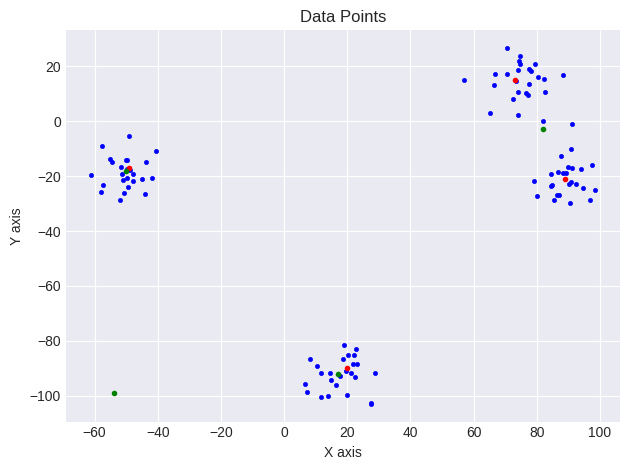

<ipython-input-6-3a55aa569098>:114: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


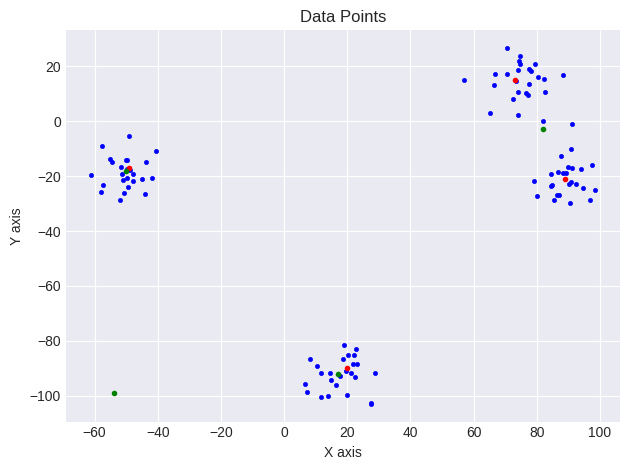

In [11]:
kmm.train_kmm(number_of_epochs=3)